<a href="https://colab.research.google.com/github/surajn581/covid19_detection/blob/master/VGG_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.utils import data_utils
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
WEIGHTS_PATH = ('https://storage.googleapis.com/tensorflow/keras-applications/'
                'vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://storage.googleapis.com/tensorflow/'
                       'keras-applications/vgg16/'
                       'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

def vgg16(image_height, image_width, channels, NUM_CLASSES, include_top=True, weights='imagenet', pooling=None):
    model = tf.keras.Sequential()
    # 1
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     activation=tf.keras.activations.relu,
                                     name='block1_conv1',
                                     input_shape=(image_height, image_width, channels)))
    model.add(tf.keras.layers.Conv2D(filters=64,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block1_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block1_pool',
                                        padding='same'))

    # 2
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=128,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block2_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block2_pool',
                                        padding='same'))

    # 3
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=256,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block3_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block3_pool',
                                        padding='same'))

    # 4
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block4_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block4_pool',
                                        padding='same'))

    # 5
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv1',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv2',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.Conv2D(filters=512,
                                     kernel_size=(3, 3),
                                     strides=1,
                                     padding='same',
                                     name='block5_conv3',
                                     activation=tf.keras.activations.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),
                                        strides=2,
                                        name='block5_pool',
                                        padding='same'))

    if include_top:
        # Classification block
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dense(units=4096,
                                        activation=tf.keras.activations.relu))
        model.add(tf.keras.layers.Dropout(rate=0.5))

        model.add(tf.keras.layers.Dense(units=NUM_CLASSES,
                                    activation=tf.keras.activations.softmax))
    else:
        if pooling == 'avg':
            model.add(tf.keras.layers.GlobalAveragePooling2D())
        elif pooling == 'max':
            model.add(tf.keras.layers.GlobalMaxPooling2D())

    if weights == 'imagenet':
        if include_top:
            weights_path = data_utils.get_file(
            'vgg16_weights_tf_dim_ordering_tf_kernels.h5',
            WEIGHTS_PATH,
            cache_subdir='models',
            file_hash='64373286793e3c8b2b4e3219cbf3544b')
        else:
            weights_path = data_utils.get_file(
                'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                file_hash='6d6bbae143d832006294945121d1f1fc')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

In [5]:
train_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/train_data"
test_path = "/content/drive/My Drive/Colab Notebooks/covid19_detection/test_data"

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2)
#validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,  
        target_size=(224, 224),  
        batch_size= 32,
        class_mode='categorical', subset="training")

validation_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical', subset="validation")







Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [6]:
train_generator.class_indices

{'covid': 0, 'healthy': 1, 'noncovid': 2}

In [18]:

baseModel = vgg16(224, 224, 3, 3, include_top=False)
headModel = baseModel.output
headModel = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = tf.keras.layers.Flatten(name='flatten')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc1')(headModel)
headModel = tf.keras.layers.Dense(4096, activation='relu', name='fc2')(headModel)
headModel = tf.keras.layers.Dropout(0.5)(headModel)
headModel = tf.keras.layers.Dense(3, activation='softmax')(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=10
)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1_input (InputLay [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

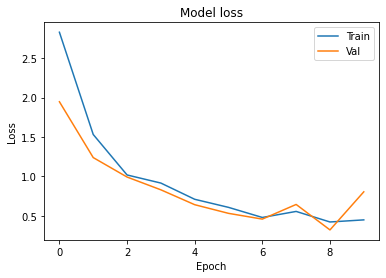

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

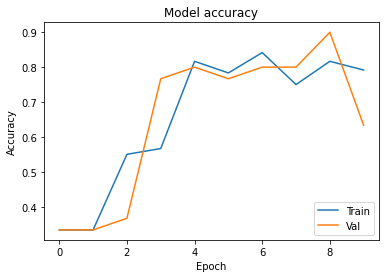

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()